In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('temp_datalab_records_social_facebook.csv',dtype={"username": object},low_memory = False)
df.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [5]:
# see in which columns the data doesn't change - can remove those columns
df.nunique()

dataset_id                4714
time                      1241
username                  4950
checkins                117065
has_added_app                1
were_here_count         244669
likes                   926145
talking_about_count     134589
facebook_id               4714
date_added             2090860
date_updated           3611781
entity_id                    0
cusip                        0
isin                         0
dtype: int64

In [6]:
# condense dataframe
df1 = df.copy()
df1['date'] = df['time'].str[:10]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.drop(['dataset_id', 'facebook_id', 'has_added_app','entity_id','cusip','isin','time'], axis=1)

df1.sort_values(by="date",ascending=True,inplace=True)
df1.head()


# Were Here count measures how many check-ins, mobile device shares, and photo location tags have been created at a business
# (https://media.thinknum.com/articles/top-10-facebook-were-here/)


# short_df['time'][0][:10]
# df1.dtypes

# df1.username.nunique()
df1.username.value_counts()
# df.username.drop_duplicates()

,username,checkins,were_here_count,likes,talking_about_count,date_added,date_updated,date
0,SodaStream,0,0,761533,587,NaN,2017-02-14 03:35:13.236826+00,2015-01-01
313,Netgear,0,0,67001,866,NaN,2017-02-14 03:12:23.103379+00,2015-01-01
312,CarMax,0,0,148734,681,NaN,2017-02-14 06:08:27.54838+00,2015-01-01
311,HuntingtonIngallsIndustries,1208,0,15243,434,NaN,2017-02-14 05:42:18.851876+00,2015-01-01
310,mhfi,1400,1400,14252,246,NaN,2017-02-14 06:27:39.895034+00,2015-01-01


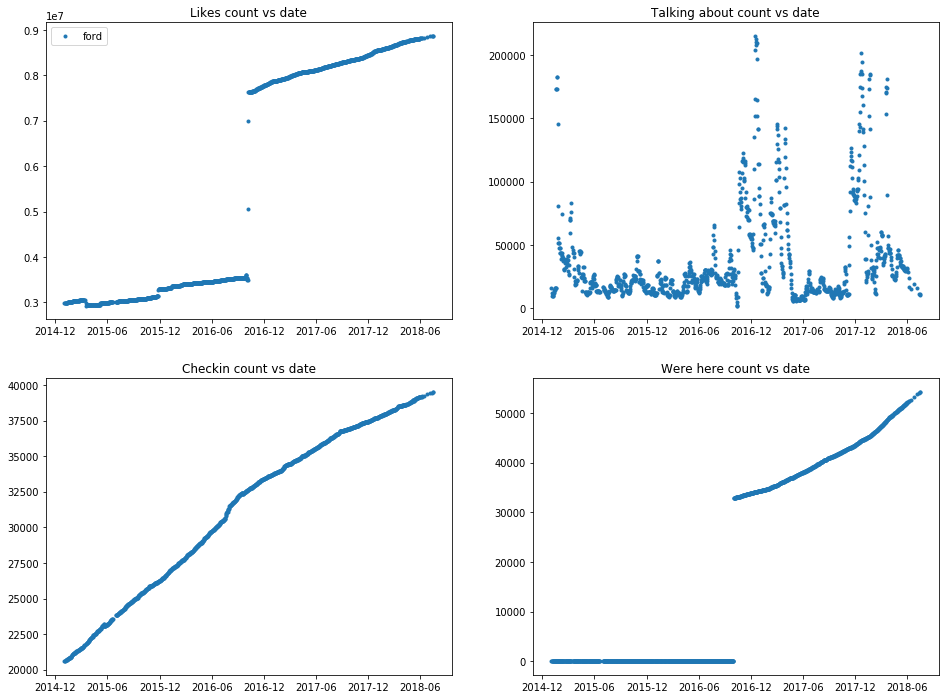

In [62]:
gb = df1.groupby('username')
cp = gb.get_group('ford').set_index("date")

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax1.plot(cp[['likes']],'.')
ax2 = fig.add_subplot(222)
ax2.plot(cp[['talking_about_count']],'.')
ax3 = fig.add_subplot(223)
ax3.plot(cp[['checkins']],'.')
ax4 = fig.add_subplot(224)
ax4.plot(cp[['were_here_count']],'.')
ax1.title.set_text('Likes count vs date')
ax2.title.set_text('Talking about count vs date')
ax3.title.set_text('Checkin count vs date')
ax4.title.set_text('Were here count vs date')
ax1.legend(cp['username']);
plt.show()

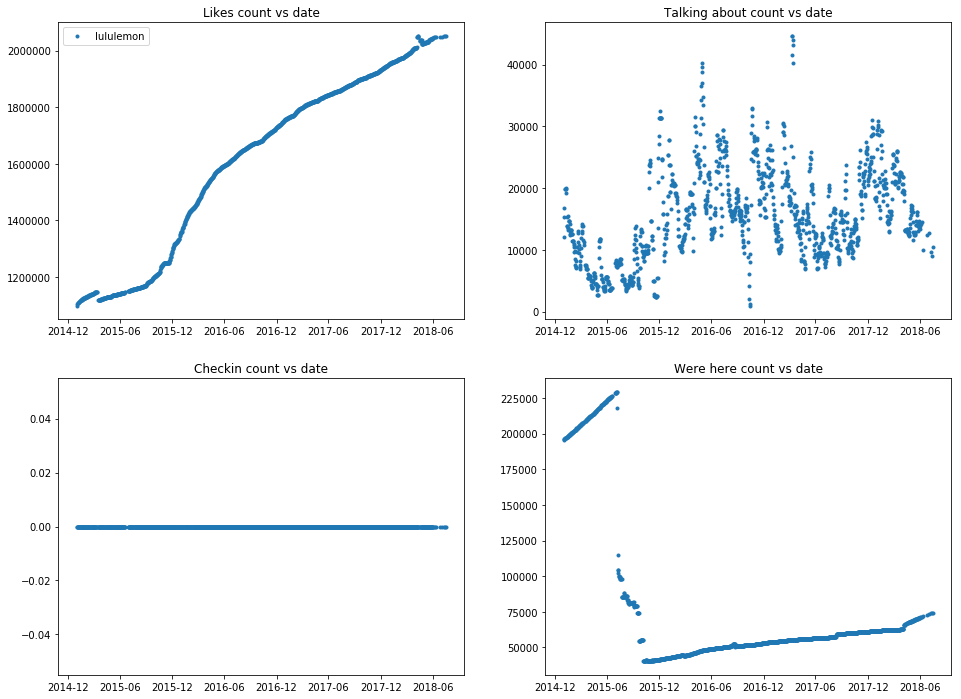

In [58]:
gb = df1.groupby('username')
cp = gb.get_group('lululemon').set_index("date")

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax1.plot(cp[['likes']],'.')
ax2 = fig.add_subplot(222)
ax2.plot(cp[['talking_about_count']],'.')
ax3 = fig.add_subplot(223)
ax3.plot(cp[['checkins']],'.')
ax4 = fig.add_subplot(224)
ax4.plot(cp[['were_here_count']],'.')
ax1.title.set_text('Likes count vs date')
ax2.title.set_text('Talking about count vs date')
ax3.title.set_text('Checkin count vs date')
ax4.title.set_text('Were here count vs date')
ax1.legend(cp['username']);
plt.show()

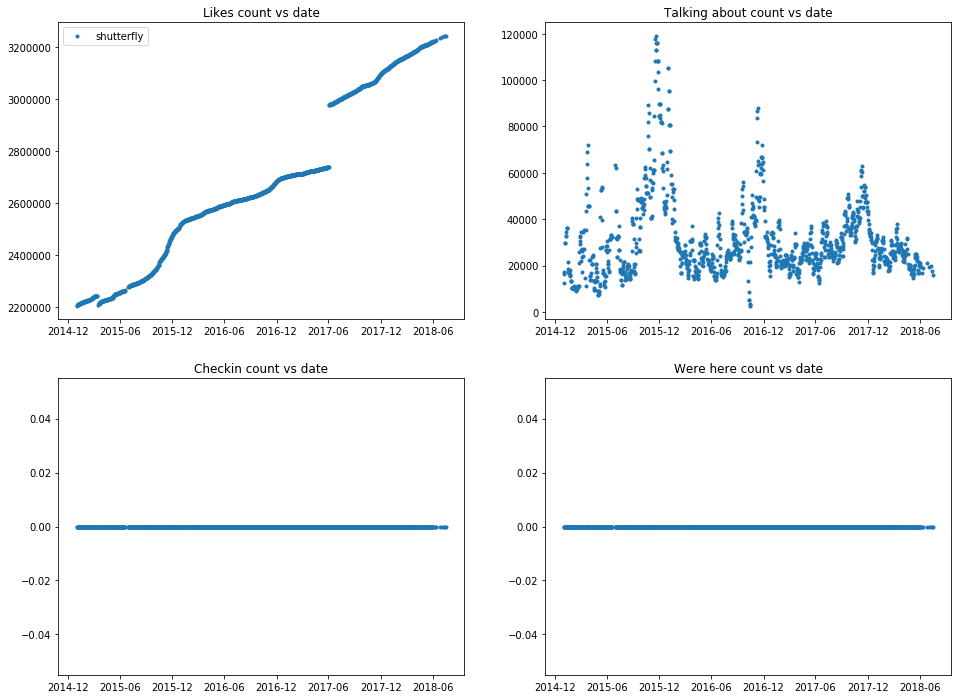

In [59]:
cp = gb.get_group('shutterfly').set_index("date")

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax1.plot(cp[['likes']],'.')
ax2 = fig.add_subplot(222)
ax2.plot(cp[['talking_about_count']],'.')
ax3 = fig.add_subplot(223)
ax3.plot(cp[['checkins']],'.')
ax4 = fig.add_subplot(224)
ax4.plot(cp[['were_here_count']],'.')
ax1.title.set_text('Likes count vs date')
ax2.title.set_text('Talking about count vs date')
ax3.title.set_text('Checkin count vs date')
ax4.title.set_text('Were here count vs date')
ax1.legend(cp['username']);
plt.show()

In [94]:
checkedin = df1.replace(0,np.NaN).dropna(axis=0) # axis 1 - columns
# checkedin.head()
# checkedin.username.value_counts()

ck = checkedin.groupby('username')
   
cc = ck.get_group('splunk').set_index("date")
cc['likes_delta'] = cc['likes'] - cc['likes'].shift(1)
cc['talking_delta'] = cc['talking_about_count'] - cc['talking_about_count'].shift(1)
cc['checkin_delta'] = cc['checkins'] - cc['checkins'].shift(1)
cc['here_delta'] = cc['were_here_count'] - cc['were_here_count'].shift(1)

cc[cc['talking_delta'] < 0] = 0
cc['talking_delta'].replace(0,np.NaN).dropna(axis=0) # axis 1 - columns

# # raw data
# cc[['likes']].plot(style = "o",figsize=(12,8))
# cc[['talking_about_count']].plot(style = "o",figsize=(12,8))
# cc[['checkins']].plot(style = "o",figsize=(12,8))
# cc[['were_here_count']].plot(style = "o",figsize=(12,8))

# # # deltas
# cc[['likes_delta']].plot(style = "o",figsize=(12,8))
# cc[['talking_delta']].plot(style = "o",figsize=(12,8))
# cc[['checkin_delta']].plot(style = "o",figsize=(12,8))


cc.head()

,username,checkins,were_here_count,likes,talking_about_count,date_added,date_updated,likes_delta,talking_delta,checkin_delta,here_delta
date,,,,,,,,,,,
2017-02-08,splunk,2416.0,2416.0,42828,544.0,2017-02-08 20:00:41.34504+00,2017-02-14 03:36:04.044703+00,NaN,NaN,NaN,NaN
2017-02-09,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0
2017-02-10,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0
2017-02-11,splunk,2418.0,2418.0,42832,285.0,2017-02-11 17:43:38.935103+00,2017-02-14 03:36:04.067365+00,-3.0,0.0,0.0,0.0
2017-02-12,splunk,2420.0,2420.0,42842,468.0,2017-02-13 16:24:23.676241+00,2017-02-14 03:36:04.071978+00,10.0,183.0,2.0,2.0


In [179]:
cr = []
cr1 = []
cr2 = []
co = []

for company, g in checkedin.groupby('username'):
    cc = checkedin.copy()[checkedin['username']==company]
    cc.set_index('date', inplace=True)
    cc.sort_index(inplace=True)    
    
    cc['likes_delta'] = cc['likes'] - cc['likes'].shift(1)
    cc['talking_delta'] = cc['talking_about_count'] - cc['talking_about_count'].shift(1)
    cc['checkin_delta'] = cc['checkins'] - cc['checkins'].shift(1)
    cc['here_delta'] = cc['were_here_count'] - cc['were_here_count'].shift(1)

    cc[cc['talking_delta'] < 0] = 0
    cc['talking_delta'].replace(0,np.NaN).dropna(axis=0) # axis 1 - columns
    
    
    cc['dates'] = cc.index
    cc['dates_diff'] = pd.to_datetime(cc['dates']) - pd.to_datetime(cc['dates'].shift(1))
    cc['day_delta'] = cc['dates_diff']/np.timedelta64(1, 'D')
    cc['day_sum'] = cc['day_delta'].cumsum()
    cc['day_sum'][0] = 0
        
    # # raw data
    # cc[['likes']].plot(style = "o",figsize=(12,8))
    # cc[['talking_about_count']].plot(style = "o",figsize=(12,8))
    # cc[['checkins']].plot(style = "o",figsize=(12,8))
    # cc[['were_here_count']].plot(style = "o",figsize=(12,8))

    # # # deltas
    # cc[['likes_delta']].plot(style = "o",figsize=(12,8))
    # cc[['talking_delta']].plot(style = "o",figsize=(12,8))
    # cc[['checkin_delta']].plot(style = "o",figsize=(12,8))


    correlation = cc['were_here_count'].corr(cc['talking_about_count'])
    correlation1 = cc['likes_delta'].corr(cc['talking_delta'])
    correlation2 = cc['day_sum'].corr(cc['talking_about_count'])
    correlation
    correlation1
    correlation2
#     print(correlation1)
    
    cr.append(correlation)
    cr1.append(correlation1)
    cr2.append(correlation1)
    co.append(company)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [194]:
corr = pd.DataFrame({'company':co,'corr_1':cr,'corr_2':cr1,'corr_3':cr2})
corr['count'] = corr.index

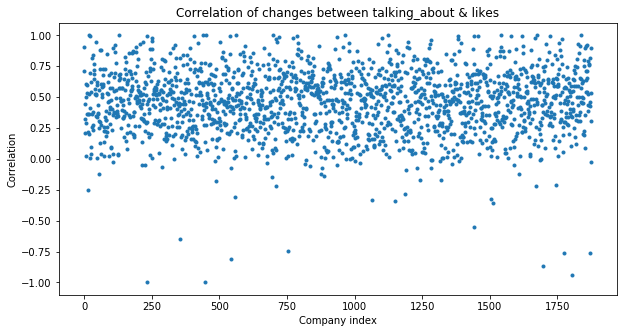

0.4535285287097241


In [203]:
plt.figure(figsize=(10, 5))
plt.plot(corr['corr_2'],'.')
plt.xlabel('Company index')
plt.ylabel('Correlation')
plt.title('Correlation of changes between talking_about & likes')
plt.show()

print(corr['corr_2'].mean())

# This plot shows the correlation between the change in the "talking_about_count" to the change in the "likes" count throughout all the available dates in the dataset. 
# The x-axis is the index of the company and the y-axis is the correlation. 
# The purpose of this graph is to visualize for which companies does the "talking_about_count" change translate to changes in the number of likes. 
# It is noted that sharp increase in "talking_about_count" relates directly yo sharp increase in "likes" for many companies.
# Values close to 1 are positive correlations, which show that "talking_about_count" changes directly translate to changes in the number of likes. 
# The mean of these correlations accross companies is 0.45352, which reveals that many companies can improve the relationship between "talking_about_count" and "likes"

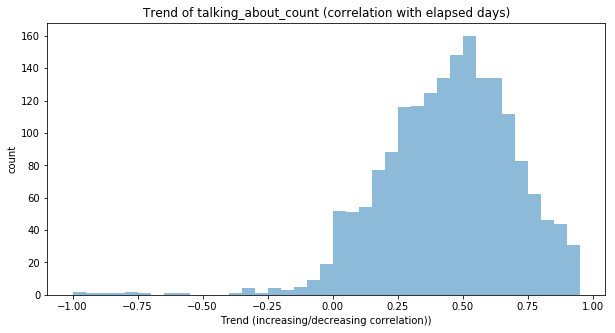

In [204]:
plt.figure(figsize=(10, 5))
bins = np.arange(-1.0, 1.0, 0.05)
plt.hist(corr['corr_3'].dropna(axis=0), bins=bins, alpha=0.5)
plt.title('Trend of talking_about_count (correlation with elapsed days)')
plt.xlabel('Trend (increasing/decreasing correlation))')
plt.ylabel('count')
plt.show()


# This histogram shows the trend of how "talking_about_counts" varies with time. A correlation on the x-axis close to 1 signififies best performance. 
# Tis visualization can inform on the overall trend, whether the company is successful in gaining social media traction by increasing "talking about counts" over time.
# It can be seen that some companies have a negative trend of "talking_about_count", which translates to reduction of social media traction.
# This data can be used to determine if companies are increasing and maintaining their social traction over time through "talking about_count", which is correlated to "likes".

In [206]:
# The trends and correlations between "talking_about_counts" and "likes" is a starting point in analyzing what determines a sucessful increase in social media traction.
# Other variables "checkins" and "were_here_count" will be analyzed to extract insights into company social media performance.

# Other factors to consider:
# 1. sort by 0 checkins - no physical business location OR physical location exists but no way to check in to business exists
# 2. sharp rise in "likes": launch of product/media/ad?
# 3. spike in "talking_about_count" correlates to rise in likes?
# 4. seasonal "talking_about_count"
# 5. what are spikes in "talking_about_count" correlated to that the company is doing?
# 6. flat "checkins" means that no physical locations
# 7. how old is the company? 
# 8. are newer companies better at social media traction?
# 9. lag between spikes (likes, checkin, talking about)